<a href="https://colab.research.google.com/github/GabaAraujo/Python_IA/blob/main/Exercicio4_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.14.0


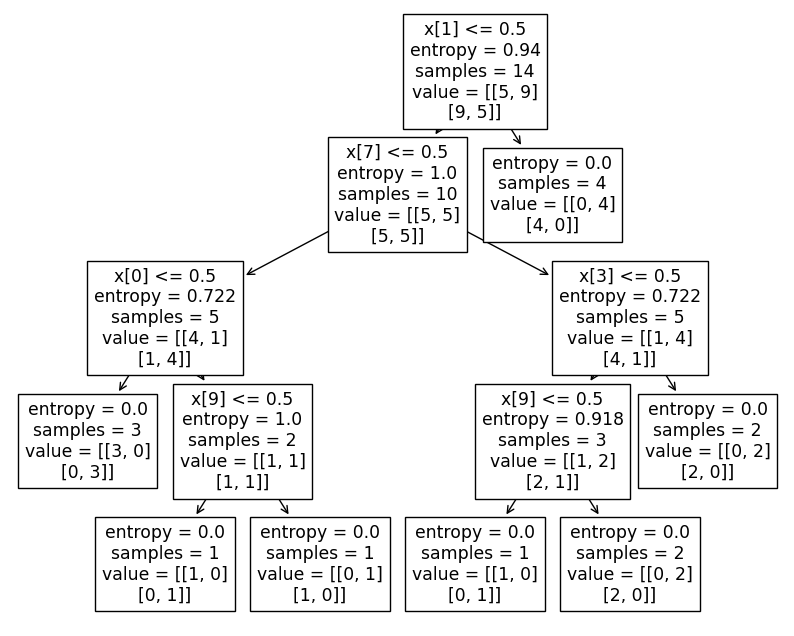

|--- Céu_nublado <= 0.50
|   |--- Umidade_normal <= 0.50
|   |   |--- Céu_chuva <= 0.50
|   |   |   |--- class: 0
|   |   |--- Céu_chuva >  0.50
|   |   |   |--- Vento_sim <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Vento_sim >  0.50
|   |   |   |   |--- class: 1
|   |--- Umidade_normal >  0.50
|   |   |--- Temperatura_alta <= 0.50
|   |   |   |--- Vento_sim <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Vento_sim >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Temperatura_alta >  0.50
|   |   |   |--- class: 1
|--- Céu_nublado >  0.50
|   |--- class: 1



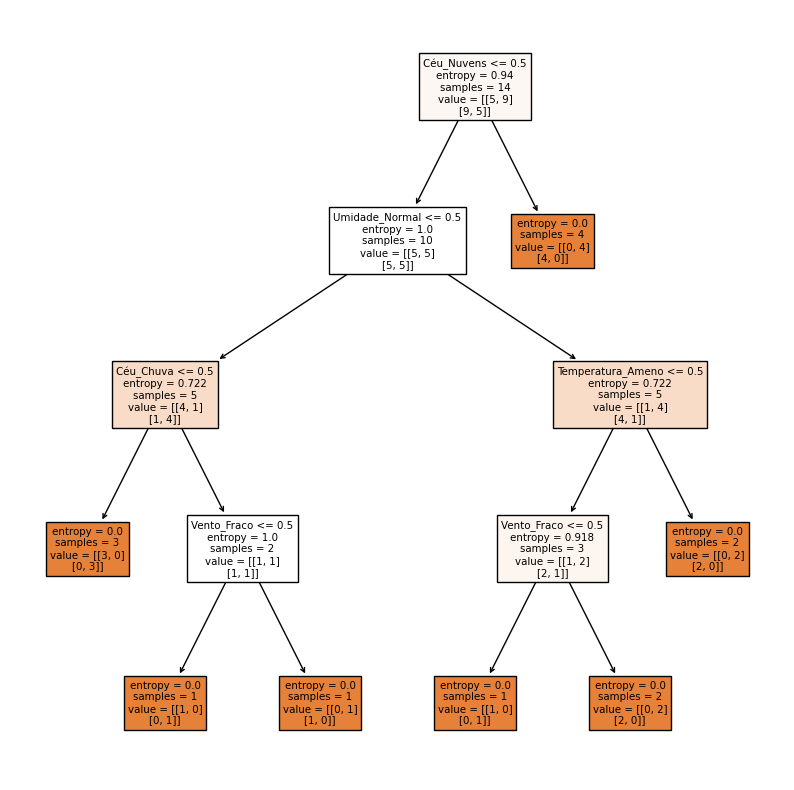

In [ ]:
# site: colab.research.google.com
# Logar com o e-mail da Puc
# Novo NoteBook

# Instala a biblioteca
!pip install numpy
!pip install matplotlib
!pip install tensorflow
!pip install scikeras

import tensorflow as tf
print(tf.__version__)


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Entrada de dados
X = np.array(
    [
      [  'Sol', 'Quente', 'Elevada', 'Fraco'],
        ['Sol', 'Quente', 'Elevada', 'Forte'],
        ['Nuvens', 'Quente', 'Elevada', 'Fraco'],
        ['Chuva', 'Ameno', 'Elevada', 'Fraco'],
        ['Chuva', 'Fresco', 'Normal', 'Fraco'],
        ['Chuva', 'Fresco', 'Normal', 'Forte'],
        [  'Nuvens', 'Fresco', 'Normal', 'Fraco'],
        [  'Sol', 'Ameno', 'Elevada', 'Fraco'],
        [  'Sol', 'Fresco', 'Normal', 'Fraco'],
        [  'Chuva', 'Ameno', 'Normal', 'Forte'],
        [  'Sol', 'Ameno', 'Normal', 'Forte'],
        [  'Nuvens', 'Ameno', 'Elevada', 'Forte'],
        [  'Nuvens', 'Quente', 'Normal', 'Fraco'],
        [  'Chuva', 'Ameno', 'Elevada', 'Forte'],
    ]
)
Y = np.array( [ 'não joga', 'não joga', 'joga', 'joga', 'joga', 'não joga', 'joga', 'não joga', 'joga', 'joga', 'joga', 'joga', 'joga', 'não joga' ] )


X1 = pd.DataFrame(X, dtype=str, columns=['Céu', 'Temperatura', 'Umidade', 'Vento'])
XX = pd.get_dummies(data=X1, columns=['Céu', 'Temperatura', 'Umidade', 'Vento'])
XX

Y1 = pd.DataFrame(Y, dtype=str, columns=['Classe'])
YY = pd.get_dummies(data=Y1, columns=['Classe'])
YY


# Criando o classificador
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=4)



# Criando a árvore
arvore = arvore.fit(XX, YY)
arvore.feature_importances_

arvore.classes_

arvore.score(XX, YY)



# Visualizando essa árvore
from sklearn import tree
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(arvore)
plt.show()



# Visualizando essa árvore 2
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore, feature_names=XX.columns, class_names = ['Não Joga', 'Joga'], filled=True)


# Regra Se- Então
from sklearn.tree import export_text
XX.columns


r = export_text(arvore, feature_names=['Céu_chuva', 'Céu_nublado', 'Céu_sol', 'Temperatura_alta',
       'Temperatura_baixa', 'Temperatura_suave', 'Umidade_alta',
       'Umidade_normal', 'Vento_não', 'Vento_sim'])
print(r)




